# Robot Path Planning and PID Control
***
# Table of Contents
1.  [Setup](#Setup)
2.  [Path Planning](#Path-Planning)
3.  [Path Smoothing](#Path-Smoothing)
4.  [PID Control](#PID-Control)


# Setup


This allowed me to split my code in several cells
making it easier to explain and mark which part of the assignment where.

For this I will mark each code cell by a quoted text, featuring which exercises where tackled.

Example:

> a(i)

```
grid = [[   .
            .
            .   ]]
```

Some code cells will have an md cell above it with the sub heading **Code Explanation** and some code cells will have one
beneath them with the sub heading **Comments**. These md cells will have code explanations and comments about the code
and/or results.

I am using python 3.7.

An html file generated by the Jupyter Notebook is attached for more readability.

In [1]:
from copy import deepcopy
from math import sqrt
import numpy as np
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

## Comments

I will be using matplotlib to draw the environment to better visualize and explain what is going on.

# Path Planning

In [2]:
grid = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
start = (3, 0)
goal = (5, 9)
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

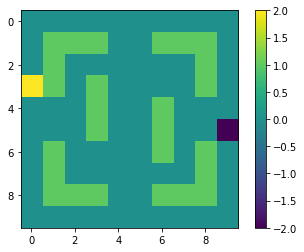

In [3]:
_gridRepresentation =  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
                        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
                        [2, 1, 0, 1, 0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 1, 0, 0, -2],
                        [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
                        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
                        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
plt.imshow(_gridRepresentation, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [4]:
def ManhattanDistance(grid, goal):
    heuristic = [[99 for x in range(len(grid))] for y in range(len(grid))]
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            heuristic[x][y] = abs(x - goal[0]) + abs(y - goal[1])

    return heuristic

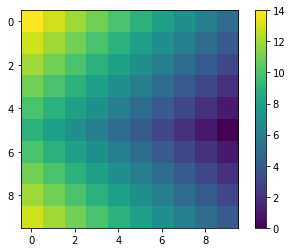

In [5]:
heuristic = ManhattanDistance(grid, goal)
plt.imshow(heuristic, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [6]:
heuristic

[[14, 13, 12, 11, 10, 9, 8, 7, 6, 5],
 [13, 12, 11, 10, 9, 8, 7, 6, 5, 4],
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3],
 [11, 10, 9, 8, 7, 6, 5, 4, 3, 2],
 [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [11, 10, 9, 8, 7, 6, 5, 4, 3, 2],
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3],
 [13, 12, 11, 10, 9, 8, 7, 6, 5, 4]]

In [7]:
def A_Star(grid, init, goal, cost, heuristic):
    current = [init[0], init[1]]
    route = [[' ' for r in range(len(grid))] for c in range(len(grid))]
    route[current[0]][current[1]] = '*'
    cost_so_far = cost
    moves = []
    while True:
        neighbours = {}
        for i, d in enumerate(delta):
            x2 = current[0] + d[0]
            y2 = current[1] + d[1]
            if 0 <= x2 < len(grid) and 0 <= y2 < len(grid[0]) and grid[x2][y2] == 0:
                neighbours[(x2, y2, i)] = (heuristic[x2][y2])
        closestV = 100
        closestP = ()
        for neighbour in neighbours:
            if neighbours[neighbour] < (closestV + cost_so_far) and route[neighbour[0]][neighbour[1]] is ' ':
                closestV = neighbours[neighbour]
                closestP = neighbour
        if closestP[0] == goal[0] and closestP[1] == goal[1]:
            route[closestP[0]][closestP[1]] = '*'
            return route, cost_so_far, moves
        else:
            current = [closestP[0], closestP[1]]
            route[closestP[0]][closestP[1]] = delta_name[closestP[2]]
            moves.append(delta_name[closestP[2]])
            cost_so_far += cost

route, step_count, moves = A_Star(grid,start,goal, cost, heuristic)
print(step_count)
print(moves)

15
['v', '>', '>', 'v', 'v', '>', '>', '>', 'v', '>', '>', '^', '^', '>']


In [8]:
route

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 ['v', '>', '>', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', 'v', ' ', ' ', ' ', ' ', '^', '>', '*'],
 [' ', ' ', 'v', '>', '>', '>', ' ', '^', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', 'v', '>', '>', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']]

In [9]:
route_with_obstacles = []
for i, x in enumerate(grid):
    line = []
    for j, y in enumerate(x):
        if grid[i][j] == 1:
            line.append('1')
        else:
            line.append(route[i][j])
    route_with_obstacles.append(line)

route_with_obstacles


[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', '1', '1', '1', ' ', ' ', '1', '1', '1', ' '],
 [' ', '1', ' ', ' ', ' ', ' ', ' ', ' ', '1', ' '],
 ['*', '1', ' ', '1', ' ', ' ', ' ', ' ', '1', ' '],
 ['v', '>', '>', '1', ' ', ' ', '1', ' ', ' ', ' '],
 [' ', ' ', 'v', '1', ' ', ' ', '1', '^', '>', '*'],
 [' ', '1', 'v', '>', '>', '>', '1', '^', '1', ' '],
 [' ', '1', ' ', ' ', ' ', 'v', '>', '>', '1', ' '],
 [' ', '1', '1', '1', ' ', ' ', '1', '1', '1', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']]

# Path Smoothing

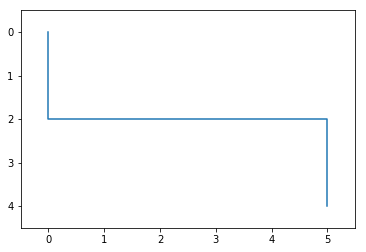

In [10]:
original_path = [[0, 0], [0, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [5, 3], [5, 4]]
x = [i[0] for i in original_path]
y = [i[1] for i in original_path]
plt.plot(x, y)
plt.ylim(4.5,-0.5)
plt.xlim(-0.5, 5.5)
plt.show()

In [39]:
def Euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def Smoothen(path, alpha=0.5, beta=0.1, tolerance=0.000001):
    smooth = deepcopy(path)
    while True:
        for x in range(1, len(path)-1):
            for y in range(1, len(path[0])):
                line = alpha*(path[x][y] - smooth[x][y])
                _alpha = beta*(smooth[x-1][y] - smooth[x][y])
                _beta = beta*(smooth[x+1][y] - smooth[x][y])

                smooth[x][y] = smooth[x][y] + line + _alpha + _beta

        if abs(Euclidean(path[1], smooth[1])) < tolerance:
            return smooth

smoothened = Smoothen(original_path)

[MSG] Tolerance is Greater...


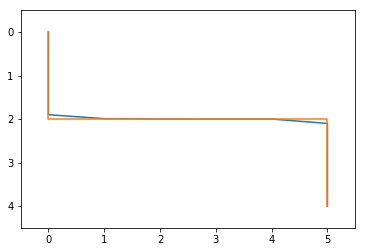

In [41]:
x = [i[0] for i in smoothened]
y = [i[1] for i in smoothened]
plt.plot(x, y)
plt.ylim(4.5,-0.5)
plt.xlim(-0.5, 5.5)
plt.show()

0.0
[MSG] Tolerance is Greater...


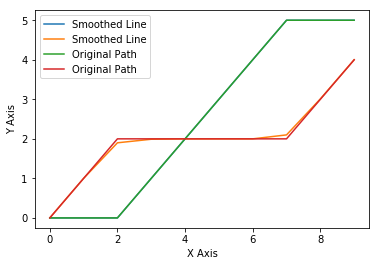

[[0, 0],
 [0, 1.0],
 [0, 1.9],
 [1, 1.99],
 [2, 1.999],
 [3, 1.9999],
 [4, 1.99999],
 [5, 2.099999],
 [5, 3.0099999],
 [5, 4]]

In [26]:
x = [i[0] for i in original_path]
y = [i[1] for i in original_path]
plt.plot(x, y)
x = [i[0] for i in smoothened]
y = [i[1] for i in smoothened]
plt.plot(x, y)
plt.ylim(4.5,-0.5)
plt.xlim(-0.5, 5.5)
plt.show()

# PID Control

Init Robot
Running robot...


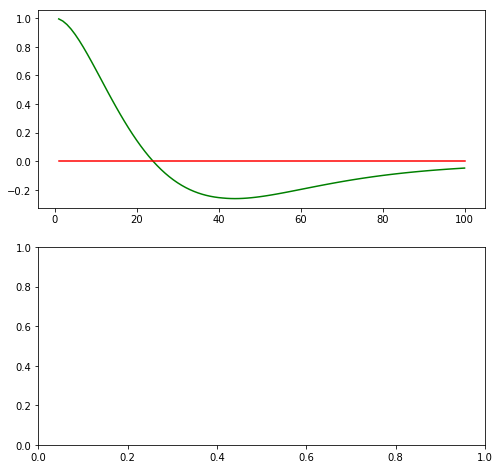

In [1]:
class Robot(object):
    def __init__(self, length=20.0):
        """
        Creates robot and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle
        distance = total distance driven, most be non-negative
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = gauss(steering, self.steering_noise)
        distance2 = gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)


print('Init Robot')
robot = Robot()
robot.set(0, 1, 0)


def run(robot, tau_p, tau_d, tau_i, n=100, speed=1.0):
    '''
        Runs the robot using given params
        tau_p:  tau for Proportional Steering
        tau_d:  tau for Differential Steering
        tau_i:  tar for Integral Steering
    '''
    x_trajectory = []
    y_trajectory = []
    # TODO: your code here
    # CTE: Cross Track Error (i.e. bias from reference)

    prev_cte = robot.y  # instantaneous CTE
    cte_sum = 0         # accumulates the total (Integral) CTE
    for i in range(n):
        cte = robot.y
        cte_diff = cte - prev_cte
        prev_cte = cte
        cte_sum += cte
        # Steering angle is a func of Proportional, Integral, Differential errors
        # weighted by their respective tau
        steer = -tau_p * cte - tau_d * cte_diff - tau_i * cte_sum
        # move the robot
        robot.move(steer, speed)
        # save current robot x,y
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory


print('Running robot...')
x_trajectory, y_trajectory = run(robot, 0.2, 3.0, 0.004)
n = len(x_trajectory)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
ax1.plot(x_trajectory, y_trajectory, 'g', label='PID controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.show()